In [1]:
import os
import cv2
import glob as gb
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import tensorflow.keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D,Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# from tensorflow.keras.backend.tensorflow_backend import set_session
from tensorflow.python.keras.backend import set_session 

# PREPROCESSING

In [2]:
IMGSIZE= 100
trdata = ImageDataGenerator(rescale=1/255)#rescale=1/255
traindata = trdata.flow_from_directory(shuffle=True,batch_size=100,directory="../input/fruit-and-vegetable-image-recognition/train",target_size=(IMGSIZE,IMGSIZE))
vldata = ImageDataGenerator(rescale=1/255)#rescale=1/255
validdata = vldata.flow_from_directory(batch_size=32,directory="../input/fruit-and-vegetable-image-recognition/validation", target_size=(IMGSIZE,IMGSIZE))
tsdata = ImageDataGenerator(rescale=1/255)#rescale=1/255
testdata = tsdata.flow_from_directory(batch_size=32,directory="../input/fruit-and-vegetable-image-recognition/test", target_size=(IMGSIZE,IMGSIZE))

Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Found 359 images belonging to 36 classes.


# VGG16

In [3]:
# Generate the model
model = Sequential()
# Layer 1: Convolutional
model.add(Conv2D(input_shape=(IMGSIZE, IMGSIZE ,3), filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
# Layer 2: Convolutional
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 3: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 4: Convolutional
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 5: Convolutional
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 6: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 7: Convolutional
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 8: Convolutional
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 9: Convolutional
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 10: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# # Layer 11: Convolutional
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
# # Layer 12: Convolutional
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
# # Layer 13: Convolutional
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
# # Layer 14: MaxPooling
# model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# # Layer 15: Convolutional
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
# # Layer 16: Convolutional
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
# # Layer 17: Convolutional
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
# # Layer 18: MaxPooling
# model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 19: Flatten
model.add(Flatten())
# Layer 20: Fully Connected Layer # standar 4098
# model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
Dropout(0.4)
# Layer 21: Fully Connected Layer
# model.add(Dense(units=1024, activation='relu'))
# Layer 22: Softmax Layer
model.add(Dense(units=36, activation='softmax'))

2022-06-01 11:12:02.901305: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-01 11:12:03.017009: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-01 11:12:03.017824: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-01 11:12:03.019281: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [4]:
optimizer = Adam()#learning_rate=0.1
model.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [5]:
histvgg16 = model.fit(traindata, validation_data=validdata,epochs=2)

2022-06-01 11:12:11.267972: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/2


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
2022-06-01 11:12:18.253447: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


32/32 [==============================] - 214s 6s/step - loss: 3.6019 - accuracy: 0.0250 - val_loss: 3.5818 - val_accuracy: 0.0285
Epoch 2/2
32/32 [==============================] - 145s 5s/step - loss: 3.5318 - accuracy: 0.0392 - val_loss: 3.3275 - val_accuracy: 0.0769


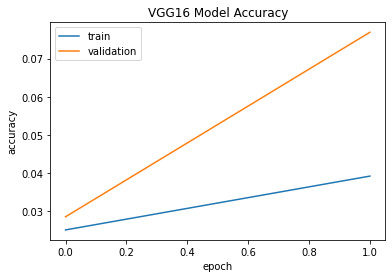

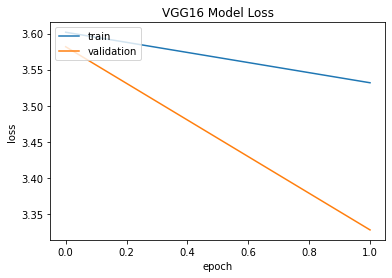

In [6]:
plt.plot(histvgg16.history['accuracy'])
plt.plot(histvgg16.history['val_accuracy'])
plt.title('VGG16 Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(histvgg16.history['loss'])
plt.plot(histvgg16.history['val_loss'])
plt.title('VGG16 Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [7]:
_, test_acc = model.evaluate(testdata, verbose=0)
test_acc

0.07520891726016998

In [8]:
# model.save("vgg16.h5")
# model.save_weights("weights")

# ALEXNET

In [9]:

import argparse
# Import necessary components to build LeNet
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.regularizers import l2

In [10]:
IMGSIZE= 100
def alexnet_model(img_shape=(IMGSIZE, IMGSIZE, 3), n_classes=36, l2_reg=0.,
    weights=None):

    # Initialize model
    alexnet = Sequential()

    # Layer 1
    alexnet.add(Conv2D(96, (11, 11), input_shape=img_shape,
    padding='same', kernel_regularizer=l2(l2_reg)))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 2
    alexnet.add(Conv2D(256, (5, 5), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 3
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(512, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 4
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(1024, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))

    # Layer 5
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(1024, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 6
    alexnet.add(Flatten())
    alexnet.add(Dense(3072))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(Dropout(0.5))

    # Layer 7
    alexnet.add(Dense(4096))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(Dropout(0.5))

    # Layer 8
    alexnet.add(Dense(n_classes))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('softmax'))

#     if weights is not None:
#     alexnet.load_weights(weights)

    return alexnet

In [11]:
alexnet = alexnet_model()

In [12]:
optimizer = Adam()#learning_rate=0.001
alexnet.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])


In [13]:
alexnethistory = alexnet.fit(traindata,epochs=25,validation_data=validdata)

Epoch 1/25
32/32 [==============================] - 147s 4s/step - loss: 2.9567 - accuracy: 0.1708 - val_loss: 58.4016 - val_accuracy: 0.0399
Epoch 2/25
32/32 [==============================] - 144s 5s/step - loss: 2.4211 - accuracy: 0.3265 - val_loss: 10.0437 - val_accuracy: 0.0826
Epoch 3/25
32/32 [==============================] - 141s 4s/step - loss: 2.2142 - accuracy: 0.3823 - val_loss: 4.5953 - val_accuracy: 0.1481
Epoch 4/25
32/32 [==============================] - 140s 4s/step - loss: 2.0532 - accuracy: 0.4286 - val_loss: 3.3004 - val_accuracy: 0.2165
Epoch 5/25
32/32 [==============================] - 139s 4s/step - loss: 1.9008 - accuracy: 0.4812 - val_loss: 3.0711 - val_accuracy: 0.2849
Epoch 6/25
32/32 [==============================] - 140s 4s/step - loss: 1.7676 - accuracy: 0.5265 - val_loss: 2.0978 - val_accuracy: 0.4387
Epoch 7/25
32/32 [==============================] - 141s 4s/step - loss: 1.5874 - accuracy: 0.5820 - val_loss: 2.0119 - val_accuracy: 0.4387
Epoch 8/25


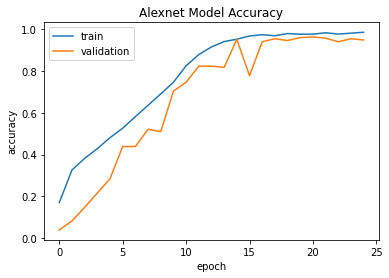

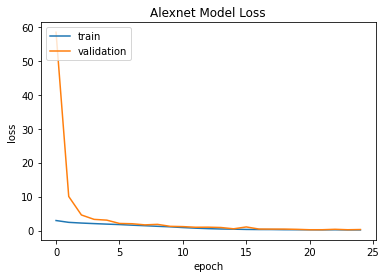

In [14]:
plt.plot(alexnethistory.history['accuracy'])
plt.plot(alexnethistory.history['val_accuracy'])
plt.title('Alexnet Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(alexnethistory.history['loss'])
plt.plot(alexnethistory.history['val_loss'])
plt.title('Alexnet Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [15]:
_, test_acc = alexnet.evaluate(testdata, verbose=0)
test_acc

0.9498607516288757

In [16]:
# alexnet.save("alexnet.h5")
# alexnet.save_weights("alexnetfolder/alexnet_weight")

In [17]:
# from PIL import Image
# image = Image.open(yol)
# newimg = image.resize((100,100))
# newimg2 = np.array(newimg)
# type(newimg2)

In [18]:
# import cv2

# yol = "../input/fruit-and-vegetable-image-recognition/test/apple/Image_1.jpg"
# resim = cv2.imread(yol)
# resim = cv2.resize(resim,[100,100])
# print(resim.shape)
# pred = alexnet.predict(resim)